In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from scipy import stats

In [3]:
sns.set_theme(color_codes=True)

In [4]:
df = pd.read_csv("simple.tsv", sep="\t")
df

,time,species,protein,transcript,ribo_density
0,0.000000,__rnase_site_ext,0.0,0.0,0.0
1,0.000000,p1,1.0,0.0,0.0
2,0.000000,rnapol,10.0,0.0,0.0
3,2.291306,__rnase_site_ext,0.0,0.0,0.0
4,2.291306,p1,0.0,0.0,0.0
...,...,...,...,...,...
249965,49999.001147,__proteinX_rbs,108.0,0.0,0.0
249966,49999.001147,__rnase_site_ext,108.0,0.0,0.0
249967,49999.001147,p1,1.0,0.0,0.0
249968,49999.001147,proteinX,0.0,108.0,0.0


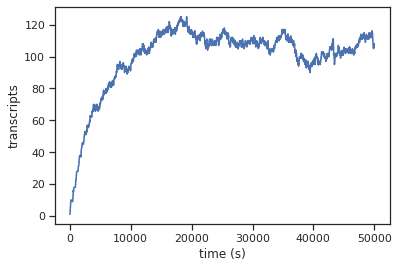

In [10]:
sns.set_theme(style="ticks", palette=None)
df_species = df[(df.species == "proteinX")]
sns.lineplot(data = df_species, x = "time", y = "transcript")
plt.xlabel("time (s)")
plt.ylabel("transcripts")
#plt.gca().axhline(110, ls='--', color="black", alpha=0.5)
plt.savefig(f"pol_10_high_binding_with_pol.png")

In [6]:
df_2 = pd.read_csv("simple2.tsv", sep="\t")
df_2

,time,species,protein,transcript,ribo_density
0,0.000000,__rnase_site_ext,0.0,0.0,0.0
1,0.000000,p1,1.0,0.0,0.0
2,0.000000,rnapol,10.0,0.0,0.0
3,392.847417,__rnase_site_ext,0.0,0.0,0.0
4,392.847417,p1,0.0,0.0,0.0
...,...,...,...,...,...
249964,49999.999205,__proteinX_rbs,12.0,0.0,0.0
249965,49999.999205,__rnase_site_ext,12.0,0.0,0.0
249966,49999.999205,p1,1.0,0.0,0.0
249967,49999.999205,proteinX,0.0,12.0,0.0


<AxesSubplot:xlabel='time', ylabel='transcript'>

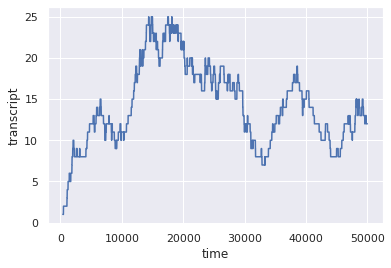

In [7]:
df_2_species = df_2[(df_2.species == "proteinX")]
sns.lineplot(data = df_2_species, x = "time", y = "transcript")
#plt.savefig(f"pol_10_low_binding_with_pol.png")

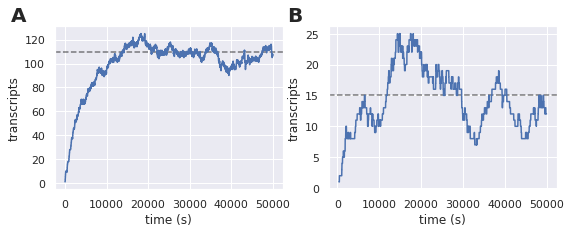

In [36]:
f = plt.figure(figsize=(9, 3))
gs = f.add_gridspec(1, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    ax.axhline(110, ls='--', color="black", alpha=0.5)
    sns.lineplot(data = df_species, x = "time", y = "transcript")
    ax.text(-0.19, 1.03, "A", transform=ax.transAxes, 
            size=20, weight='bold')
    ax.set_xlabel("time (s)")
    ax.set_ylabel("transcripts")

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    ax.axhline(15, ls='--', color="black", alpha=0.5)
    sns.lineplot(data = df_2_species, x = "time", y = "transcript")
    ax.text(-0.18, 1.03, "B", transform=ax.transAxes, 
            size=20, weight='bold')
    ax.set_xlabel("time (s)")
    ax.set_ylabel("transcripts")
    
plt.savefig("pol_10_all.png", bbox_inches="tight")

In [4]:
df = pd.read_csv("polymerases.csv")

In [8]:
#sns.scatterplot(data = df, x = "rate", y = "pol")
#plt.xscale("log")
np.polyfit(df["rate"], np.log(df["pol"]), 2)

array([-4.11796899e-14,  9.23873759e-07,  1.91049712e-01])

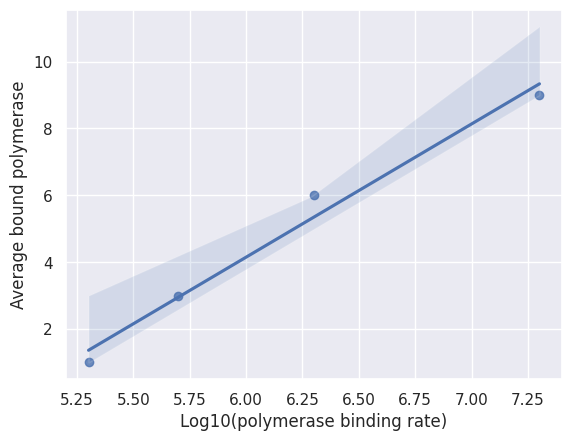

In [49]:
df['rate_log10'] = np.log10(df['rate'])
df
sns.regplot(x="rate_log10", y="pol", data=df)
plt.xlabel("Log10(polymerase binding rate)")
plt.ylabel("Average bound polymerase")
plt.savefig(f"pol_reg.png")

In [50]:
stats.linregress(df['rate_log10'],df['pol'])

LinregressResult(slope=3.9851118657353517, intercept=-19.760490298243507, rvalue=0.990837324082328, pvalue=0.009162675917671946, stderr=0.3841069907897585, intercept_stderr=2.380124757526592)

In [35]:
df3 = pd.read_csv("simple3.tsv", sep="\t")
df3

,time,species,protein,transcript,ribo_density
0,0.000000,__rnase_site_ext,0.0,0.0,0.0
1,0.000000,p1,1.0,0.0,0.0
2,0.000000,rnapol,20.0,0.0,0.0
3,196.423708,__rnase_site_ext,0.0,0.0,0.0
4,196.423708,p1,0.0,0.0,0.0
...,...,...,...,...,...
249959,49998.999748,__proteinX_rbs,32.0,0.0,0.0
249960,49998.999748,__rnase_site_ext,32.0,0.0,0.0
249961,49998.999748,p1,1.0,0.0,0.0
249962,49998.999748,proteinX,0.0,32.0,0.0


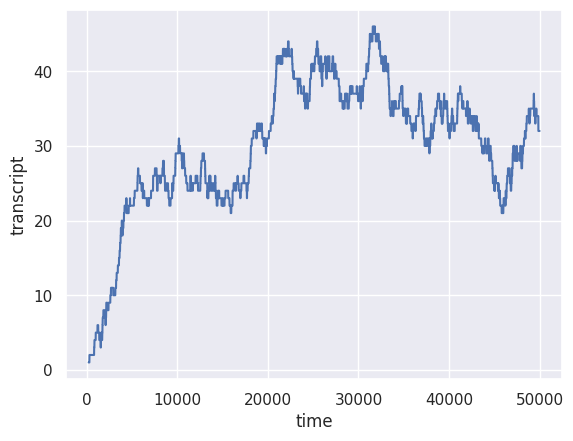

In [36]:
df_3_species = df3[(df3.species == "proteinX")]
sns.lineplot(data = df_3_species, x = "time", y = "transcript")
plt.savefig(f"pol_20_low_binding.png")